In [0]:
import os
import zipfile

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

1.15.0


In [0]:
# downloading training dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

# downloading validation dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2019-12-15 10:07:22--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 2607:f8b0:4001:c12::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   204MB/s    in 0.7s    

2019-12-15 10:07:23 (204 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2019-12-15 10:07:24--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 2607:f8b0:4001:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [applicati

In [0]:
# extracting training dataset
local_zip = '/tmp/horse-or-human.zip' # extract horse-or-human
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human') # extract TO horse-or-human

# extracting validation dataset
local_zip = '/tmp/validation-horse-or-human.zip' # extract validation-horse-or-human
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human') # extract TO validation-horse-or-human

# closing zip reference object
zip_ref.close()

In [0]:
# we do not have file contain labels
# instead we use the name of the directory as the label

In [0]:
# # OPTIONAL ---------------------------------------------------------------------------------

# # Directory with our training horse and human pictures
# train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
# train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# # Directory with our training horse and human pictures
# validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
# validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

# # storing training image's filename in directory
# train_horse_names = os.listdir(train_horse_dir)
# train_human_names = os.listdir(train_human_dir)
# print(train_horse_names[:10])
# print(train_human_names[:10])

# # storing testing image's filename in directory
# validation_horse_hames = os.listdir(validation_horse_dir)
# validation_human_names = os.listdir(validation_human_dir)
# print(validation_horse_hames[:10])
# print(validation_human_names[:10])

# print('total training horse images:', len(os.listdir(train_horse_dir)))
# print('total training human images:', len(os.listdir(train_human_dir)))
# print('total validation horse images:', len(os.listdir(validation_horse_dir)))
# print('total validation human images:', len(os.listdir(validation_human_dir)))

In [0]:
# # OPTIONAL ---------------------------------------------

# %matplotlib inline

# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# # Parameters for our graph; we'll output images in a 4x4 configuration
# nrows = 4
# ncols = 4

# # Index for iterating over images
# pic_index = 0

# # Set up matplotlib fig, and size it to fit 4x4 pics
# fig = plt.gcf()
# fig.set_size_inches(ncols * 4, nrows * 4)

# pic_index += 8
# next_horse_pix = [os.path.join(train_horse_dir, fname) 
#                 for fname in train_horse_names[pic_index-8:pic_index]]
# next_human_pix = [os.path.join(train_human_dir, fname) 
#                 for fname in train_human_names[pic_index-8:pic_index]]

# for i, img_path in enumerate(next_horse_pix+next_human_pix):
#   # Set up subplot; subplot indices start at 1
#   sp = plt.subplot(nrows, ncols, i + 1)
#   sp.axis('Off') # Don't show axes (or gridlines)

#   img = mpimg.imread(img_path)
#   plt.imshow(img)

# plt.show()

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)), # input shape is the desired size of the image 300x300 with 3 bytes color

    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(), # Flatten the results to feed into a DNN
    tf.keras.layers.Dense(512, activation='relu'), # 512 neuron hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid') # Only 1 output neuron. It will give a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255,
                                           rotation_range=40,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           horizontal_flip=True,
                                           fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1./255)  

train_generator = train_datagen.flow_from_directory(  # Flow training images in batches of 128 using train_datagen generator
        '/tmp/horse-or-human/',   # This is the source directory for training images
        target_size=(300, 300),   # All images will be resized to 150x150
        batch_size=128,           # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(  # Flow training images in batches of 128 using train_datagen generator
        '/tmp/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),             # All images will be resized to 150x150
        batch_size=32,                      # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [0]:
# Fitting the model

history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 86s 11s/step - loss: 1.2142 - acc: 0.5195 - val_loss: 0.5943 - val_acc: 0.6680
Epoch 2/15
8/8 [==============================] - 84s 11s/step - loss: 2.1026 - acc: 0.6785 - val_loss: 0.7927 - val_acc: 0.6367
Epoch 3/15
8/8 [==============================] - 96s 12s/step - loss: 0.5590 - acc: 0.7334 - val_loss: 0.5251 - val_acc: 0.8086
Epoch 4/15
8/8 [==============================] - 75s 9s/step - loss: 0.5119 - acc: 0.7649 - val_loss: 0.5894 - val_acc: 0.7734
Epoch 5/15
8/8 [==============================] - 95s 12s/step - loss: 0.3562 - acc: 0.8604 - val_loss: 0.5988 - val_acc: 0.8711
Epoch 6/15
8/8 [==============================] - 85s 11s/step - loss: 0.3193 - acc: 0.8432 - val_loss: 0.7222 - val_acc: 0.8438
Epoch 7/15
8/8 [==============================] - 75s 9s/step - loss: 0.2003 - acc: 0.9199 - val_loss: 1.0411 - val_acc: 0.8555
Epoch 8/15
8/8 [==============================] - 95s 12s/step - loss: 0.1472 - acc: 0.9434 - val_l

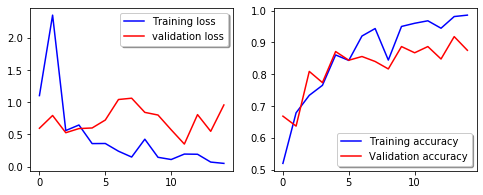

In [0]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss")
legend = ax[0].legend(loc='best', shadow=True)


ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [0]:
# # OPTIONAL ----------------------------------------------------------------

# # predicting uploaded images

# import numpy as np
# from google.colab import files
# from keras.preprocessing import image

# uploaded = files.upload()

# for fn in uploaded.keys():
 
#   # predicting images
#   path = '/content/' + fn
#   img = image.load_img(path, target_size=(300, 300))
#   x = image.img_to_array(img)
#   x = np.expand_dims(x, axis=0)

#   images = np.vstack([x])
#   classes = model.predict(images, batch_size=10)
#   print(classes[0])
#   if classes[0]>0.5:
#     print(fn + " is a human")
#   else:
#     print(fn + " is a horse")

In [0]:
# # OPTIONAL ----------------------------------------------------------

# # intermediate result visualization

# import numpy as np
# import random
# from tensorflow.keras.preprocessing.image import img_to_array, load_img

# # Let's define a new Model that will take an image as input, and will output
# # intermediate representations for all layers in the previous model after
# # the first.
# successive_outputs = [layer.output for layer in model.layers[1:]]
# #visualization_model = Model(img_input, successive_outputs)
# visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# # Let's prepare a random input image from the training set.
# horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
# human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
# img_path = random.choice(horse_img_files + human_img_files)

# img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
# x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
# x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# # Rescale by 1/255
# x /= 255

# # Let's run our image through our network, thus obtaining all
# # intermediate representations for this image.
# successive_feature_maps = visualization_model.predict(x)

# # These are the names of the layers, so can have them as part of our plot
# layer_names = [layer.name for layer in model.layers]

# # Now let's display our representations
# for layer_name, feature_map in zip(layer_names, successive_feature_maps):
#   if len(feature_map.shape) == 4:
#     # Just do this for the conv / maxpool layers, not the fully-connected layers
#     n_features = feature_map.shape[-1]  # number of features in feature map
#     # The feature map has shape (1, size, size, n_features)
#     size = feature_map.shape[1]
#     # We will tile our images in this matrix
#     display_grid = np.zeros((size, size * n_features))
#     for i in range(n_features):
#       # Postprocess the feature to make it visually palatable
#       x = feature_map[0, :, :, i]
#       x -= x.mean()
#       x /= x.std()
#       x *= 64
#       x += 128
#       x = np.clip(x, 0, 255).astype('uint8')
#       # We'll tile each filter into this big horizontal grid
#       display_grid[:, i * size : (i + 1) * size] = x
#     # Display the grid
#     scale = 20. / n_features
#     plt.figure(figsize=(scale * n_features, scale))
#     plt.title(layer_name)
#     plt.grid(False)
#     plt.imshow(display_grid, aspect='auto', cmap='viridis')

